In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv.gz


In [4]:
train = pd.read_csv('../input/home-data-for-ml-course/train.csv')
test = pd.read_csv('../input/home-data-for-ml-course/test.csv')
train.shape, test.shape

# Exploring features

In [7]:
trt = train.copy()
print(trt.shape)
trt = pd.get_dummies(trt, drop_first=True)
trt.shape

(1460, 81)


(1460, 247)

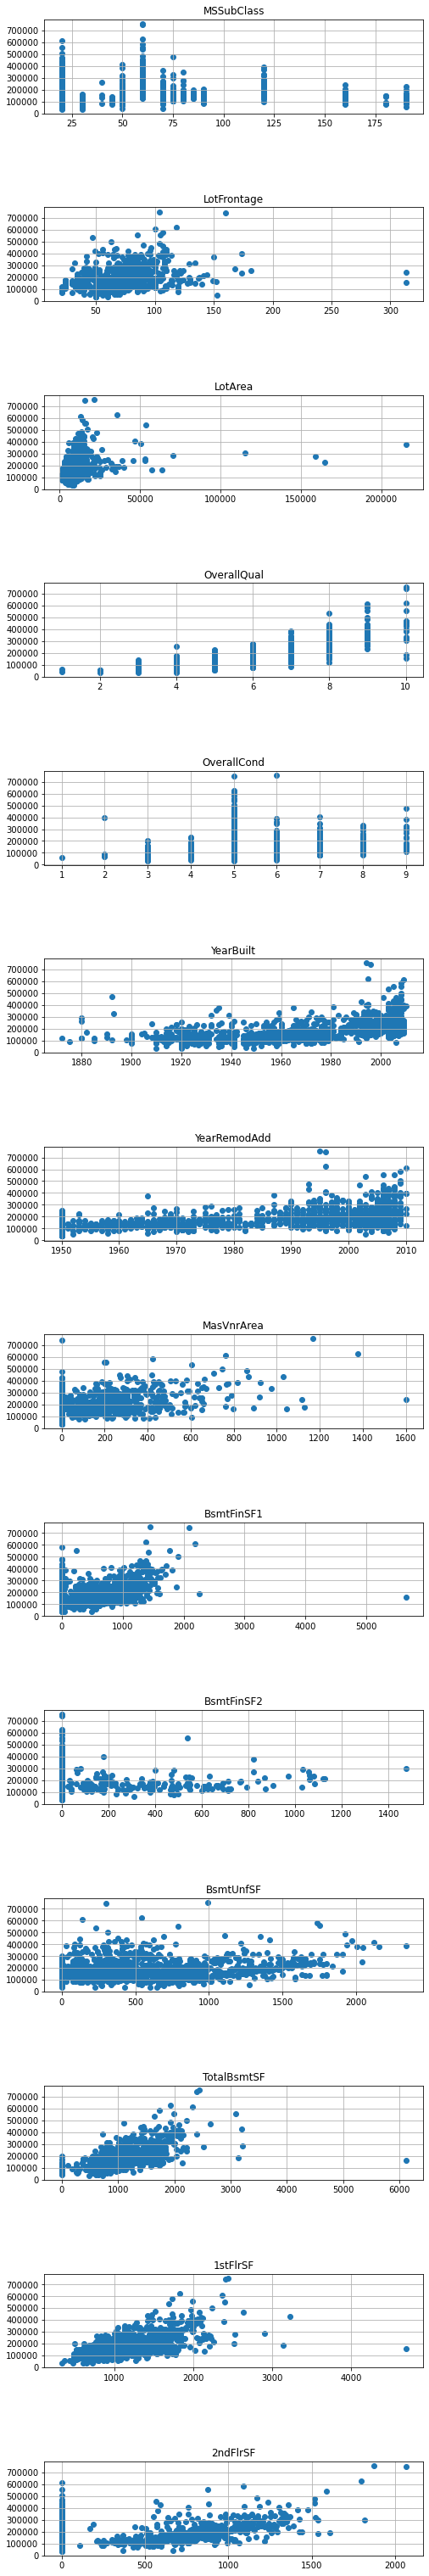

In [50]:
cols = trt.columns[1:15]    # change indexes to plot different features against SalePrice
fig, ax = plt.subplots(len(cols), figsize=(8,55))
fig.subplots_adjust(hspace=1)
for i, c in enumerate(cols):
    ax[i].scatter(trt[c], trt['SalePrice'])
    ax[i].set_yticks(range(0, trt['SalePrice'].max(), 100_000))
    ax[i].grid()
    ax[i].set_title(c)
plt.show()

# Removing Outliers

In [9]:
outliers = []

# outliers.append(trt[trt['OverallCond']==5][trt['SalePrice']>700_000].index)
# outliers.append(trt[trt['OverallCond']==2][trt['SalePrice']>300_000].index)
# outliers.append(trt[trt['OverallCond']==6][trt['SalePrice']>700_000].index)
outliers.append(trt[trt['OverallQual']==10][trt['SalePrice']<200_000].index)
outliers.append(trt[trt['LotArea']>100_000].index)
outliers.append(trt[trt['LotFrontage']>300].index)
outliers.append(trt[trt['YearBuilt']<1900][trt['SalePrice']>200_000].index)
outliers.append(trt[trt['YearRemodAdd']<2000][trt['SalePrice']>600_000].index)
outliers.append(trt[trt['MasVnrArea']==1600].index)
outliers.append(trt[trt['TotalBsmtSF']>3000][trt['SalePrice']<300_000].index)
outliers.append(trt[trt['1stFlrSF']>2700][trt['SalePrice']<500_000].index)
outliers.append(trt[trt['BsmtFullBath']==3.0].index)
outliers.append(trt[trt['GrLivArea']>3300][trt['SalePrice']<300_000].index)
outliers.append(trt[trt['FullBath']==0.0][trt['SalePrice']>300_000].index)
outliers.append(trt[trt['GarageArea']>1200][trt['SalePrice']<200_000].index)
outliers.append(trt[trt['OpenPorchSF']>500].index)

outliers = [x[0] for x in outliers]
outliers

[523, 249, 934, 185, 691, 297, 332, 496, 738, 304, 53, 1061, 495]

In [10]:
train.drop(outliers, axis=0, inplace=True)
y = train['SalePrice']
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [11]:
trt.shape, train.shape

((1460, 247), (1447, 81))

# Dealing with Missing Values

In [12]:
df = pd.concat([train.drop(['SalePrice'], axis=1), test], join='outer')
df.drop(['Id'], axis=1)
df.shape

(2906, 80)

In [13]:
empty = [x for x in df if df[x].isna().sum() != 0]
for x in empty:
    if df[x].dtype == 'float64':
        print(x)
    if df[x].dtype == 'int64':
        print(x)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


I read the description of each feature and accordingly i filled their missing values with either the most repetitive values(mode) for categorical features, average for numerical features and 'None' for some features.

For example, it would be ridiculous to add Alley feature to the houses whose Alley feature is missing so a new value i.e. 'none' is added for such houses. Similarly every house has a Kitchen so i didnt put 'none' for missing KitchenQual values, rather i filled with most common KitchenQual value. Hope this kinda makes sense.

In [14]:
to_mode = [
    'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional',
    'SaleType', 'LotFrontage'
]

to_none = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature'
]

to_mean = [
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'
]

In [15]:
for x in to_mod:
    df[x+'for_na'] = df[x].apply(lambda a:0 if pd.isnull(a)==True else 1)
    df[x] = df[x].fillna(df[x].mode()[0])
for x in to_zero:
    df[x+'for_na'] = df[x].apply(lambda a:0 if pd.isnull(a)==True else 1)
    df[x] = df[x].fillna(df[x].mean())
for x in to_mean:
    df[x+'for_na'] = df[x].apply(lambda a:0 if pd.isnull(a)==True else 1)
    df[x] = df[x].fillna('None')

In [16]:
df.isna().sum()

Id                    0
MSSubClass            0
MSZoning              0
LotFrontage           0
LotArea               0
Street                0
Alley                 0
LotShape              0
LandContour           0
Utilities             0
LotConfig             0
LandSlope             0
Neighborhood          0
Condition1            0
Condition2            0
BldgType              0
HouseStyle            0
OverallQual           0
OverallCond           0
YearBuilt             0
YearRemodAdd          0
RoofStyle             0
RoofMatl              0
Exterior1st           0
Exterior2nd           0
MasVnrType            0
MasVnrArea            0
ExterQual             0
ExterCond             0
Foundation            0
BsmtQual              0
BsmtCond              0
BsmtExposure          0
BsmtFinType1          0
BsmtFinSF1            0
BsmtFinType2          0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
Heating               0
HeatingQC             0
CentralAir      

# Dropping Less Important Features

In [17]:
train.corr()[-1:]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.011492,-0.085663,0.364049,0.265961,0.79361,-0.095435,0.545226,0.514446,0.48057,0.384857,-0.01063,0.20655,0.615277,0.6023,0.307609,-0.0586,0.704895,0.235224,-0.039689,0.56555,0.285043,0.163118,-0.13766,0.529944,0.460831,0.49698,0.646858,0.633192,0.315872,0.337407,-0.137327,0.047675,0.099792,0.096464,-0.020607,0.057879,-0.018212,1.0


In [18]:
cols_to_drop = [ 'YrSold', 'MoSold', 'BsmtHalfBath', 'BsmtFinSF2', 'KitchenAbvGr',
                'LowQualFinSF', 'BedroomAbvGr', '3SsnPorch', 
               ]
df.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
df['MSSubClass'] = df['MSSubClass'].astype('category')

In [20]:
df = pd.get_dummies(df)
print(df.isna().sum().sum())
df.head(1)

0


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MSZoningfor_na,Utilitiesfor_na,Exterior1stfor_na,Exterior2ndfor_na,Electricalfor_na,KitchenQualfor_na,Functionalfor_na,SaleTypefor_na,LotFrontagefor_na,MasVnrAreafor_na,BsmtFinSF1for_na,BsmtFinSF2for_na,BsmtUnfSFfor_na,TotalBsmtSFfor_na,BsmtFullBathfor_na,BsmtHalfBathfor_na,GarageYrBltfor_na,GarageCarsfor_na,GarageAreafor_na,Alleyfor_na,MasVnrTypefor_na,BsmtQualfor_na,BsmtExposurefor_na,BsmtCondfor_na,BsmtFinType1for_na,BsmtFinType2for_na,FireplaceQufor_na,GarageTypefor_na,GarageFinishfor_na,GarageQualfor_na,GarageCondfor_na,PoolQCfor_na,Fencefor_na,MiscFeaturefor_na,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFi

In [21]:
X = df[:train.shape[0]]
train = df[:train.shape[0]]
tst = df[train.shape[0]:]

In [56]:
X.shape, tst.shape

((1447, 344), (1459, 344))

# Modelling

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
X = StandardScaler().fit_transform(X)
tst = StandardScaler().fit_transform(tst)
X.shape

(1447, 344)

In [25]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.01)

In [52]:
#Ridge
params = {
    'alpha': [25, 35],
    'max_iter': [None, 1000, 5000],
    'solver': ['svd', 'lsqr', 'sag', 'saga', 'sparse_cg', 'sparse_cg']
}

M1 = GridSearchCV(
    Ridge(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
)
M1.fit(X, y)

print(M1.best_estimator_)

mean_absolute_error(y_ts, M1.predict(X_ts))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s


Ridge(alpha=35, solver='svd')


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   10.7s finished


8371.41618391282

In [53]:
# Lasso
params = {
    'alpha': [0.1, 1, 3],
    'max_iter': [40_000],
}

M2 = GridSearchCV(
    Lasso(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
)

M2.fit(X, y)
print(M2.best_estimator_)

mean_absolute_error(y_ts, M2.predict(X_ts))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   26.0s finished


Lasso(alpha=0.1, max_iter=40000)


8831.691212795315

In [54]:
# SVC
params = {
    'kernel': ['rbf', 'sigmoid', 'linear'],
    'C'  : [0,0.5,1,4],
    'gamma' : [None, 0.01, 0.1, 1, 3]  
}

M4 = GridSearchCV(
    SVR(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
)

M4.fit(X, y)
print(M4.best_estimator_)

mean_absolute_error(y_ts, M4.predict(X_ts))

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   24.4s finished


SVR(C=4, gamma=0.01, kernel='linear')


28007.15812480891

In [55]:
#Gradient Boost
params = {
    'n_estimators': [500],
    'learning_rate': [0.01, 0.03, 0.1, 1],
    'loss': ['ls'],
}

M5 = GridSearchCV(
    GradientBoostingRegressor(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
).fit(X,y)

print(M5.best_estimator_)

mean_absolute_error(y_ts, M5.predict(X_ts))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   23.6s finished


GradientBoostingRegressor(n_estimators=500)


6183.183929819213

In [29]:
# XG boost
params = {
    'learning_rate': [0.003, 0.01],
    'n_estimators': [3000, 4000],
    'max_depth': [2, 3],
    'min_child_weight': [0, 1],
    'gamma': [0],
    'subsample': [0.5, 0.7],
    'colsample_bytree':[0.5, 0.7],
    'objective': ['reg:squarederror'],
    'scale_pos_weight': [1, 2],
    'reg_alpha': [0.00001, 0.001]
}

M6 = GridSearchCV(
    XGBRegressor(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
).fit(X,y)

print(M6.best_estimator_)

mean_absolute_error(y_ts, M6.predict(X_ts))

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 55.0min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 107.4min finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=4000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)


5835.793229166667

In [26]:
# model = XGBRegressor(learning_rate=0.01, n_estimators=3460,
#                      max_depth=3, min_child_weight=0,
#                      gamma=0, subsample=0.7,
#                      colsample_bytree=0.7,
#                      objective='reg:squarederror', nthread=-1,
#                      scale_pos_weight=1, seed=27,
#                      reg_alpha=0.00006)
# model.fit(X,y)
# mean_absolute_error(y_ts, model.predict(X_ts))

6143.595833333334

# Predicting and Submitting

In [30]:
preds = M6.predict(tst)
tst.shape

(1459, 344)

In [31]:
submit_file = pd.read_csv('../input/home-data-for-ml-course/sample_submission.csv')
submit_file['SalePrice'] = preds
submit_file.to_csv('submission.csv', index=False)

In [57]:
submit_file.shape

(1459, 2)